# Chapter 7: Interpolation

Robert Johansson

Source code listings for [Numerical Python - Scientific Computing and Data Science Applications with Numpy, SciPy and Matplotlib](https://link.springer.com/book/10.1007/979-8-8688-0413-7) (ISBN 979-8-8688-0412-0).

In [240]:
%matplotlib inline

import matplotlib as mpl

mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.size"] = "12"

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams["font.family"] = "serif"
mpl.rcParams["font.sans-serif"] = "stix"

In [241]:
import numpy as np

In [242]:
from numpy import polynomial as P

In [243]:
from scipy import interpolate

In [244]:
import matplotlib.pyplot as plt

In [245]:
from scipy import linalg

# Polynomials

In [246]:
p1 = P.Polynomial([1, 2, 3])

In [247]:
p1

Polynomial([1., 2., 3.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [248]:
p1.__repr__()

"Polynomial([1., 2., 3.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')"

In [249]:
p2 = P.Polynomial.fromroots([-1, 1])

In [250]:
p2

Polynomial([-1.,  0.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [251]:
p1.roots()

array([-0.33333333-0.47140452j, -0.33333333+0.47140452j])

In [252]:
p2.roots()

array([-1.,  1.])

In [253]:
p1.coef

array([1., 2., 3.])

In [254]:
p1.domain

array([-1.,  1.])

In [255]:
p1.window

array([-1.,  1.])

In [256]:
p1(np.array([1.5, 2.5, 3.5]))

array([10.75, 24.75, 44.75])

In [257]:
(p1 + p2).__repr__

<bound method ABCPolyBase.__repr__ of Polynomial([0., 2., 4.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')>

In [258]:
p2 / 5

Polynomial([-0.2,  0. ,  0.2], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [259]:
p1 = P.Polynomial.fromroots([1, 2, 3])

In [260]:
p1

Polynomial([-6., 11., -6.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [261]:
p2 = P.Polynomial.fromroots([2])

In [262]:
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [263]:
p3 = p1 // p2

In [264]:
p3

Polynomial([ 3., -4.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [265]:
p3.roots()

array([1., 3.])

In [266]:
p2

Polynomial([-2.,  1.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [267]:
c1 = P.Chebyshev([1, 2, 3])

In [268]:
c1

Chebyshev([1., 2., 3.], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [269]:
c1.roots()

array([-0.76759188,  0.43425855])

In [270]:
c = P.Chebyshev.fromroots([-1, 1])

In [271]:
c

Chebyshev([-0.5,  0. ,  0.5], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [272]:
l = P.Legendre.fromroots([-1, 1])

In [273]:
l

Legendre([-0.66666667,  0.        ,  0.66666667], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [274]:
c(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

In [275]:
l(np.array([0.5, 1.5, 2.5]))

array([-0.75,  1.25,  5.25])

# Polynomial interpolation

In [276]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 3, 5, 4])

In [277]:
deg = len(x) - 1

In [278]:
A = P.polynomial.polyvander(x, deg)

In [279]:
c = linalg.solve(A, y)

In [280]:
c

array([ 2. , -3.5,  3. , -0.5])

In [281]:
f1 = P.Polynomial(c)

In [282]:
f1(2.5)

np.float64(4.1875)

In [283]:
A = P.chebyshev.chebvander(x, deg)

In [284]:
c = linalg.solve(A, y)

In [285]:
c

array([ 3.5  , -3.875,  1.5  , -0.125])

In [286]:
f2 = P.Chebyshev(c)

In [287]:
f2(2.5)

np.float64(4.187500000000001)

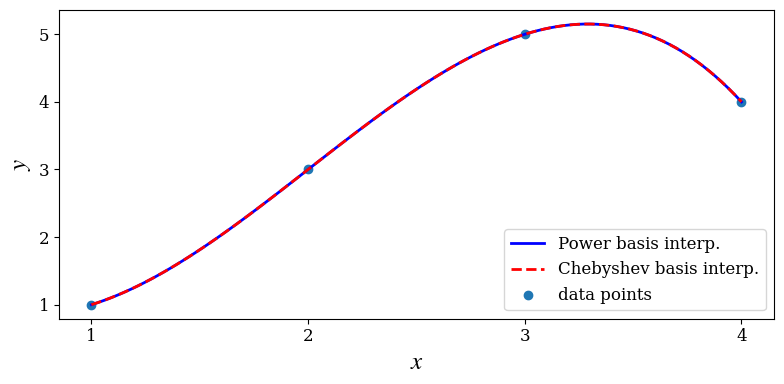

In [288]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), "b", lw=2, label="Power basis interp.")
ax.plot(xx, f2(xx), "r--", lw=2, label="Chebyshev basis interp.")
ax.scatter(x, y, label="data points")

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig("ch7-polynomial-interpolation.pdf");

In [289]:
f1b = P.Polynomial.fit(x, y, deg)

In [290]:
f1b

Polynomial([ 4.1875,  3.1875, -1.6875, -1.6875], domain=[1., 4.], window=[-1.,  1.], symbol='x')

In [291]:
f2b = P.Chebyshev.fit(x, y, deg)

In [292]:
f2b

Chebyshev([ 3.34375 ,  1.921875, -0.84375 , -0.421875], domain=[1., 4.], window=[-1.,  1.], symbol='x')

In [293]:
np.linalg.cond(P.chebyshev.chebvander(x, deg))

np.float64(4659.738424140432)

In [294]:
np.linalg.cond(P.chebyshev.chebvander((2 * x - 5) / 3.0, deg))

np.float64(1.8542033440472903)

In [295]:
(2 * x - 5) / 3.0

array([-1.        , -0.33333333,  0.33333333,  1.        ])

In [296]:
f1 = P.Polynomial.fit(x, y, 1)
f2 = P.Polynomial.fit(x, y, 2)
f3 = P.Polynomial.fit(x, y, 3)

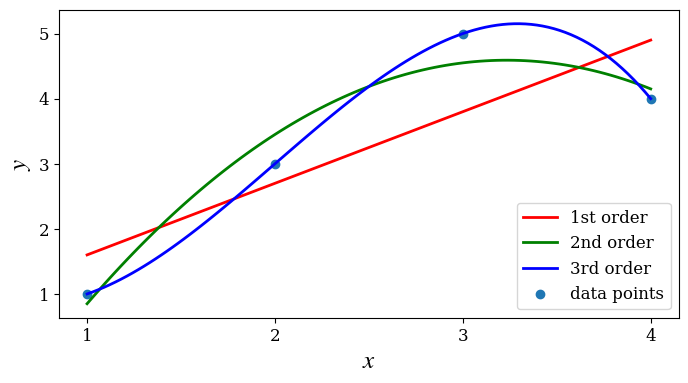

In [297]:
xx = np.linspace(x.min(), x.max(), 100)

fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, f1(xx), "r", lw=2, label="1st order")
ax.plot(xx, f2(xx), "g", lw=2, label="2nd order")
ax.plot(xx, f3(xx), "b", lw=2, label="3rd order")
ax.scatter(x, y, label="data points")

ax.legend(loc=4)
ax.set_xticks(x)
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18);

## Runge problem

In [298]:
def runge(x):
    return 1 / (1 + 25 * x**2)

In [299]:
def runge_interpolate(n):
    x = np.linspace(-1, 1, n + 1)
    p = P.Polynomial.fit(x, runge(x), deg=n)
    return x, p

In [300]:
xx = np.linspace(-1, 1, 250)

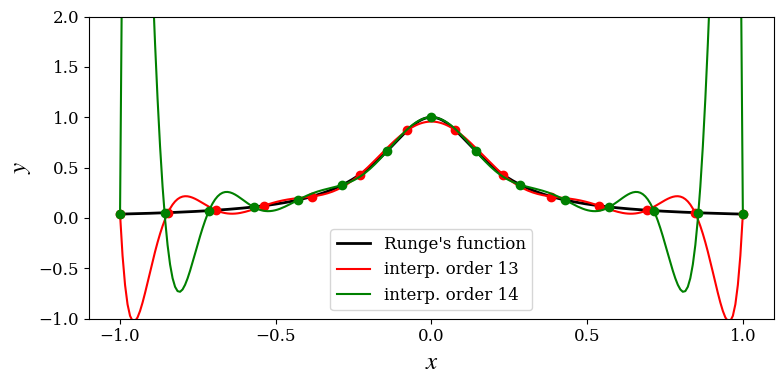

In [301]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

ax.plot(xx, runge(xx), "k", lw=2, label="Runge's function")

n = 13
x, p = runge_interpolate(n)
ax.plot(x, runge(x), "ro")
ax.plot(xx, p(xx), "r", label="interp. order %d" % n)

n = 14
x, p = runge_interpolate(n)
ax.plot(x, runge(x), "go")
ax.plot(xx, p(xx), "g", label="interp. order %d" % n)

ax.legend(loc=8)
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 2)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig("ch7-polynomial-interpolation-runge.pdf");

# Spline interpolation

In [302]:
x = np.linspace(-1, 1, 11)

In [303]:
y = runge(x)

In [304]:
f = interpolate.interp1d(x, y, kind=3)

In [305]:
xx = np.linspace(-1, 1, 100)

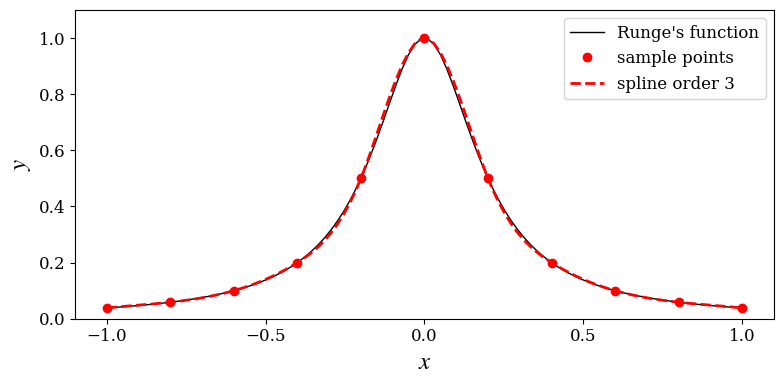

In [306]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(xx, runge(xx), "k", lw=1, label="Runge's function")
ax.plot(x, y, "ro", label="sample points")
ax.plot(xx, f(xx), "r--", lw=2, label="spline order 3")

ax.legend()
ax.set_ylim(0, 1.1)
ax.set_xticks([-1, -0.5, 0, 0.5, 1])
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig("ch7-spline-interpolation-runge.pdf");

In [307]:
x = np.array([0, 1, 2, 3, 4, 5, 6, 7])

In [308]:
y = np.array([3, 4, 3.5, 2, 1, 1.5, 1.25, 0.9])

In [309]:
xx = np.linspace(x.min(), x.max(), 100)

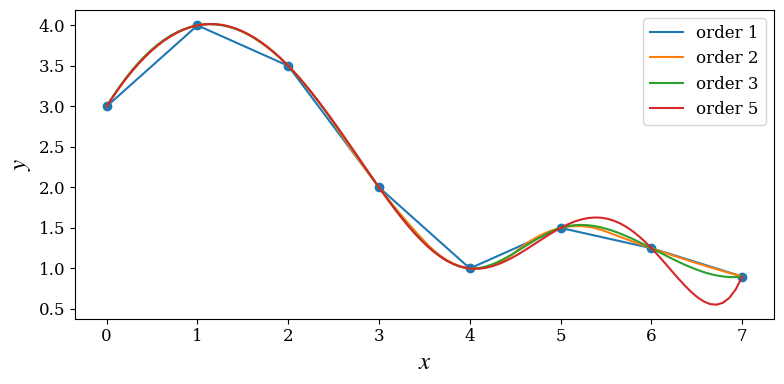

In [310]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.scatter(x, y)

for n in [1, 2, 3, 5]:
    f = interpolate.interp1d(x, y, kind=n)
    ax.plot(xx, f(xx), label="order %d" % n)

ax.legend()
ax.set_ylabel(r"$y$", fontsize=18)
ax.set_xlabel(r"$x$", fontsize=18)

fig.tight_layout()
fig.savefig("ch7-spline-interpolation-orders.pdf");

# Multivariate interpolation

### Regular grid

In [311]:
x = y = np.linspace(-2, 2, 10)

In [312]:
def f(x, y):
    return np.exp(-((x + 0.5) ** 2) - 2 * (y + 0.5) ** 2) - np.exp(
        -((x - 0.5) ** 2) - 2 * (y - 0.5) ** 2
    )

In [313]:
X, Y = np.meshgrid(x, y)

In [314]:
# simulate noisy data at fixed grid points X, Y
Z = f(X, Y) + 0.05 * np.random.randn(*X.shape)

In [315]:
f_interp = interpolate.RegularGridInterpolator((x, y), Z, method="cubic")

In [316]:
xx = yy = np.linspace(x.min(), x.max(), 100)

In [317]:
XX, YY = np.meshgrid(xx, yy)
ZZi = f_interp(np.vstack((XX.ravel(), YY.ravel())).T).reshape(XX.shape)

In [318]:
XX, YY = np.meshgrid(xx, yy)

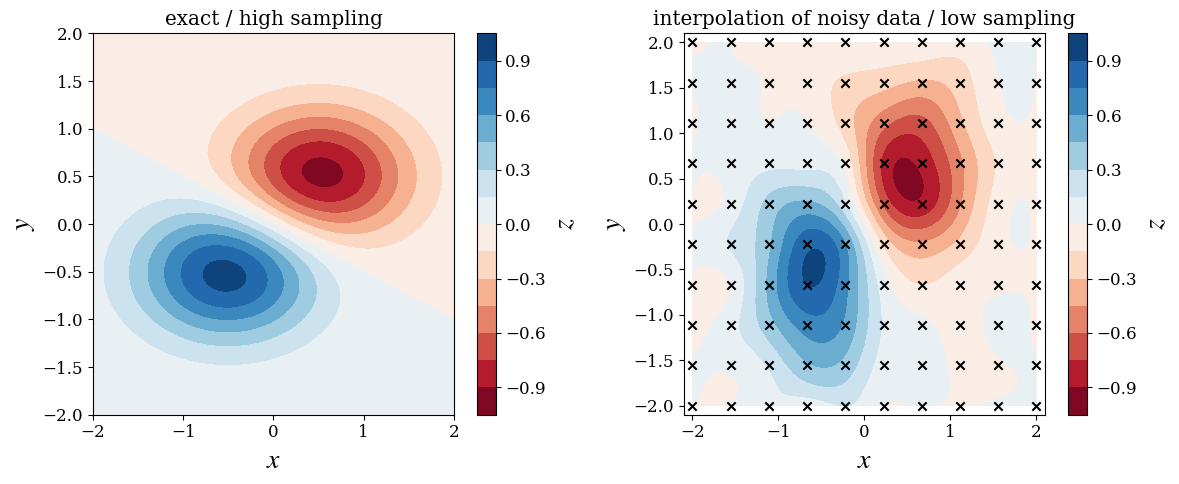

In [319]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

c = axes[0].contourf(XX, YY, f(XX, YY), 15, cmap=plt.cm.RdBu)
axes[0].set_xlabel(r"$x$", fontsize=20)
axes[0].set_ylabel(r"$y$", fontsize=20)
axes[0].set_title("exact / high sampling")
cb = fig.colorbar(c, ax=axes[0])
cb.set_label(r"$z$", fontsize=20)

c = axes[1].contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
axes[1].set_ylim(-2.1, 2.1)
axes[1].set_xlim(-2.1, 2.1)
axes[1].set_xlabel(r"$x$", fontsize=20)
axes[1].set_ylabel(r"$y$", fontsize=20)
axes[1].scatter(X, Y, marker="x", color="k")
axes[1].set_title("interpolation of noisy data / low sampling")
cb = fig.colorbar(c, ax=axes[1])
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
fig.savefig("ch7-multivariate-interpolation-regular-grid.pdf")

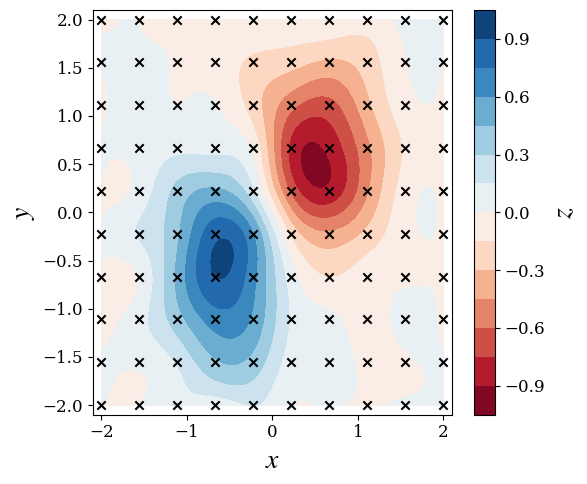

In [320]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))

c = ax.contourf(XX, YY, ZZi, 15, cmap=plt.cm.RdBu)
ax.set_ylim(-2.1, 2.1)
ax.set_xlim(-2.1, 2.1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)
ax.scatter(X, Y, marker="x", color="k")
cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
# fig.savefig('ch7-multivariate-interpolation-regular-grid.pdf')

### Irregular grid

In [321]:
np.random.seed(115925231)

In [322]:
x = y = np.linspace(-1, 1, 100)

In [323]:
X, Y = np.meshgrid(x, y)

In [324]:
def f(x, y):
    return np.exp(-(x**2) - y**2) * np.cos(4 * x) * np.sin(6 * y)

In [325]:
Z = f(X, Y)

In [326]:
N = 500

In [327]:
xdata = np.random.uniform(-1, 1, N)

In [328]:
ydata = np.random.uniform(-1, 1, N)

In [329]:
zdata = f(xdata, ydata)

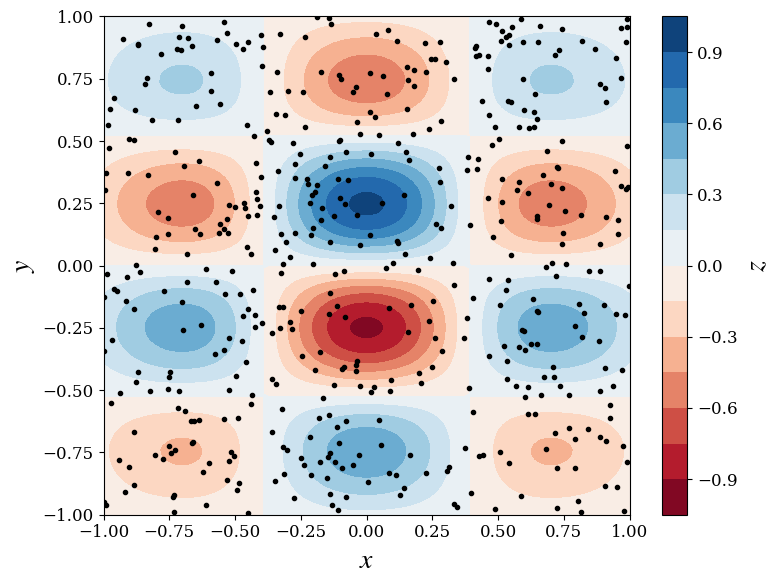

In [330]:
fig, ax = plt.subplots(figsize=(8, 6))
c = ax.contourf(X, Y, Z, 15, cmap=plt.cm.RdBu)
ax.scatter(xdata, ydata, marker=".", color="black")
ax.set_ylim(-1, 1)
ax.set_xlim(-1, 1)
ax.set_xlabel(r"$x$", fontsize=20)
ax.set_ylabel(r"$y$", fontsize=20)

cb = fig.colorbar(c, ax=ax)
cb.set_label(r"$z$", fontsize=20)

fig.tight_layout()
fig.savefig("ch7-multivariate-interpolation-exact.pdf");

In [331]:
def z_interpolate(xdata, ydata, zdata):
    Zi_0 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method="nearest")
    Zi_1 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method="linear")
    Zi_3 = interpolate.griddata((xdata, ydata), zdata, (X, Y), method="cubic")
    return Zi_0, Zi_1, Zi_3

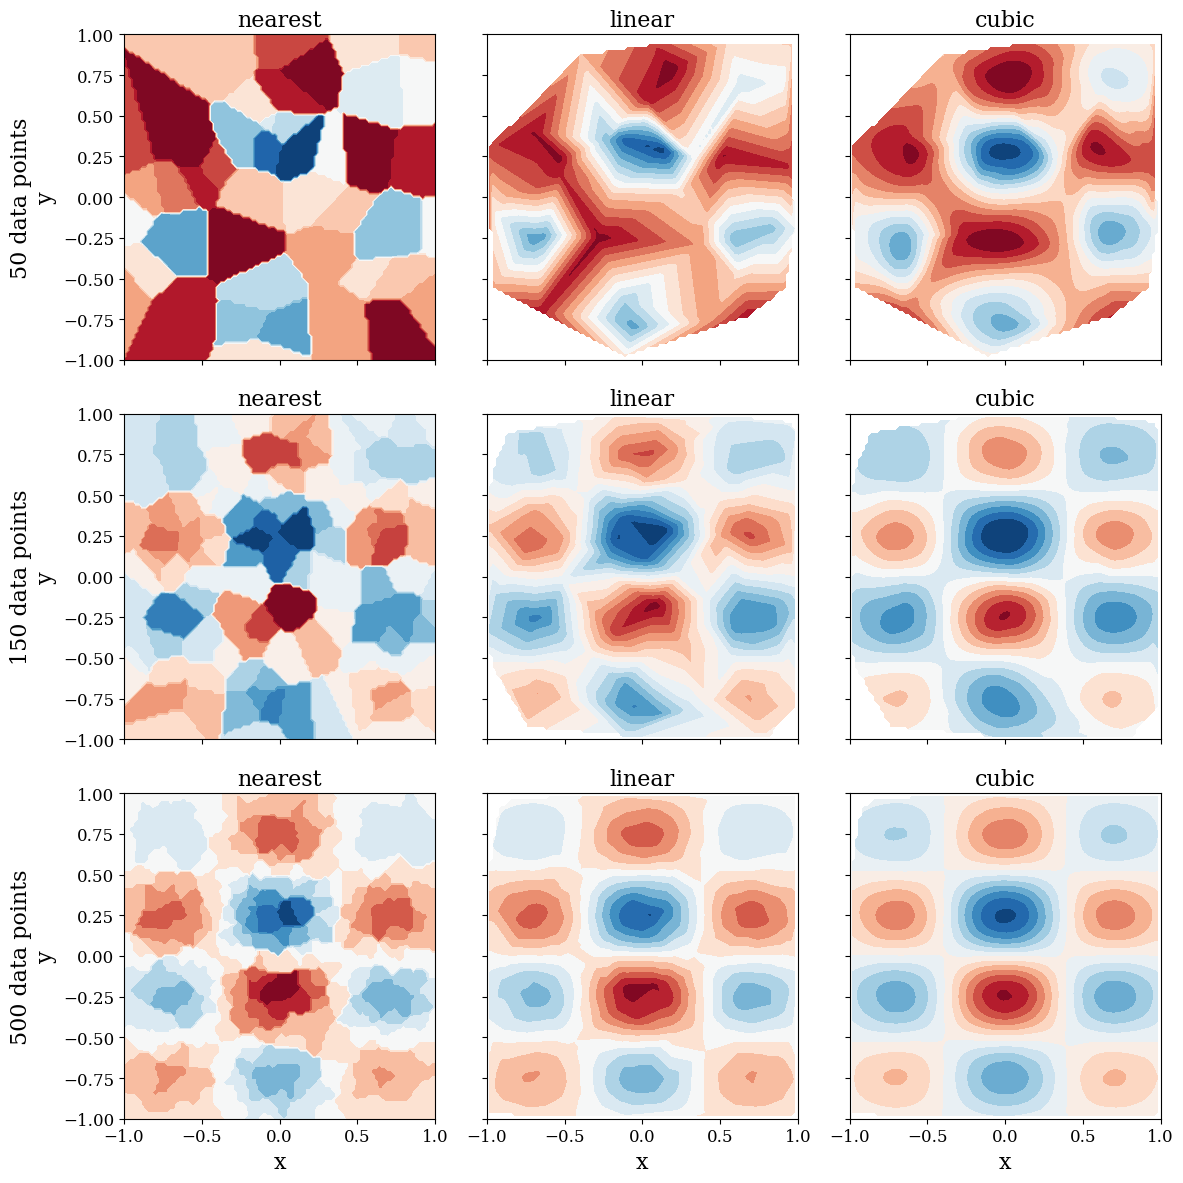

In [332]:
fig, axes = plt.subplots(3, 3, figsize=(12, 12), sharex=True, sharey=True)

n_vec = [50, 150, 500]

for idx, n in enumerate(n_vec):
    Zi_0, Zi_1, Zi_3 = z_interpolate(xdata[:n], ydata[:n], zdata[:n])
    axes[idx, 0].contourf(X, Y, Zi_0, 15, cmap=plt.cm.RdBu)
    axes[idx, 0].set_ylabel("%d data points\ny" % n, fontsize=16)
    axes[idx, 0].set_title("nearest", fontsize=16)
    axes[idx, 1].contourf(X, Y, Zi_1, 15, cmap=plt.cm.RdBu)
    axes[idx, 1].set_title("linear", fontsize=16)
    axes[idx, 2].contourf(X, Y, Zi_3, 15, cmap=plt.cm.RdBu)
    axes[idx, 2].set_title("cubic", fontsize=16)

for m in range(len(n_vec)):
    axes[2, m].set_xlabel("x", fontsize=16)

fig.tight_layout()
fig.savefig("ch7-multivariate-interpolation-interp.pdf");